In [ ]:
import pandas as pd
df = pd.read_csv("/content/ecg_autoencoder_dataset.csv",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1


In [ ]:
from sklearn.preprocessing import StandardScaler
df = df.dropna()
df.isnull().sum().sum()
ss = StandardScaler()
x = ss.fit_transform(df.drop([140],axis=1))
y = df[140]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: 140, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,)

In [ ]:
from ctypes import alignment
id = xtrain.shape[1]
od = 16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer

emodel = Sequential()
emodel.add(InputLayer(input_shape = (id,)))
emodel.add(Dense(64,activation="relu"))
emodel.add(Dense(32,activation="relu"))
emodel.add(Dense(od,activation="relu"))


dmodel = Sequential()
dmodel.add(InputLayer(input_shape = (od,)))
dmodel.add(Dense(64,activation="relu"))
dmodel.add(Dense(32,activation="relu"))
dmodel.add(Dense(id,activation="softmax"))


aen = Sequential()
aen.add(emodel)
aen.add(dmodel)

aen.compile(loss="mean_squared_error",optimizer="adam",metrics=["accuracy"])
h = aen.fit(xtrain,xtrain,epochs=500,validation_data=(xtest,xtest))

Epoch 1/500
125/125 [==============================] - 3s 5ms/step - loss: 0.9774 - accuracy: 0.0343 - val_loss: 1.0355 - val_accuracy: 0.0690
Epoch 2/500
125/125 [==============================] - 0s 4ms/step - loss: 0.9701 - accuracy: 0.1053 - val_loss: 1.0340 - val_accuracy: 0.1000
Epoch 3/500
125/125 [==============================] - 0s 3ms/step - loss: 0.9694 - accuracy: 0.1256 - val_loss: 1.0336 - val_accuracy: 0.1410
Epoch 4/500
125/125 [==============================] - 1s 4ms/step - loss: 0.9690 - accuracy: 0.1316 - val_loss: 1.0333 - val_accuracy: 0.1280
Epoch 5/500
125/125 [==============================] - 0s 4ms/step - loss: 0.9689 - accuracy: 0.1406 - val_loss: 1.0331 - val_accuracy: 0.1470
Epoch 6/500
125/125 [==============================] - 0s 3ms/step - loss: 0.9687 - accuracy: 0.1403 - val_loss: 1.0331 - val_accuracy: 0.1370
Epoch 7/500
125/125 [==============================] - 0s 4ms/step - loss: 0.9686 - accuracy: 0.1491 - val_loss: 1.0328 - val_accuracy: 0.1550

In [ ]:
predictions = aen.predict(xtest)
import numpy as np
from sklearn.metrics import accuracy_score
mse = np.mean((xtest - predictions)**2, axis=1)

threshold = np.percentile(mse, 95)

y_test_pred = np.where(mse > threshold, 1, 0)
accuracy_score(ytest,y_test_pred)

32/32 [==============================] - 0s 8ms/step


0.403

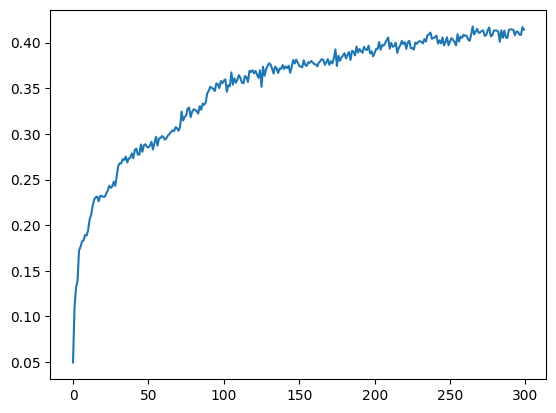

In [ ]:
import matplotlib.pyplot as plt
plt.plot(h.history["accuracy"])